## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [ ]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (500, 3)
shape of y is (500,)


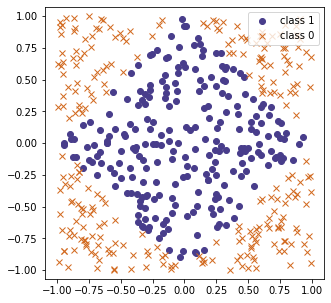

In [ ]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500 #numero esempi del dataset
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2)) #matrice del dataset (ho due sole feature, 2 neuroni nel primo strato)
x_mat_bias = np.ones((num_obs,1)) #bias: rumore del modello
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1) #concateno feature e bias

# PICK ONE PATTERN BELOW and comment out the rest.
#Etichette delle y generate in diversi modi

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

#Stampo il dataset (forma sulla base delle y)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

Here are some helper functions

In [ ]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16): # ATTENTION: for simplicity in the slides we use a different function!
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    #eps è per evitare divisioni con zero
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2): # ATTENTION: we use a slightly different network here with respect to that shown in the slides
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1) #matrice iniziale per pesi
    a_2 = sigmoid(z_2) #funzione di attivazione ->ottengo l'uscita dei neuroni
    z_3 = np.dot(a_2, W_2) # * matrice dei pesi dello strato di output
    y_pred = sigmoid(z_3).reshape((len(x_mat),)) #ottengo la predizione, 1 solo neurone di output per la classificazione binaria (restituisco la proabilità che la funzioen apppartenga alla classe 1)
    # Now compute the gradient -> a RITROSO
    J_z_3_grad = -y + y_pred # Logloss here = cross-entropy with softmax!
    J_W_2_grad = np.dot(J_z_3_grad, a_2) #calcolo rispetto alla matrice W2
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2)) #calcolo a2 rispetto a z2 (= derivata della sigmoide)
    #calcolo la derivata della loss rispetto a W1
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T  # .reshape(-1,1) puts an array into a column shape (lo giro da riga a colonna)
    #reshape(-1,1) -> per evitare di specificare la dimensione dell'array e creare il vettore colonna
    gradient = (J_W_1_grad, J_W_2_grad) #gradiente -> direzione di modifica
    
    # return
    return y_pred, gradient

#Plotto i valori su un grafico
def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8)) #crea una figura
    fig.suptitle('Log Loss and Accuracy over iterations') #titolo della figura
    
    #Creazione del primo sottografo
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals) #array di valori da plottare
    ax.grid(True) #griglia visibile
    ax.set(xlabel='iterations', title='Log Loss')
    
    #creazione del secondo sottografo
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

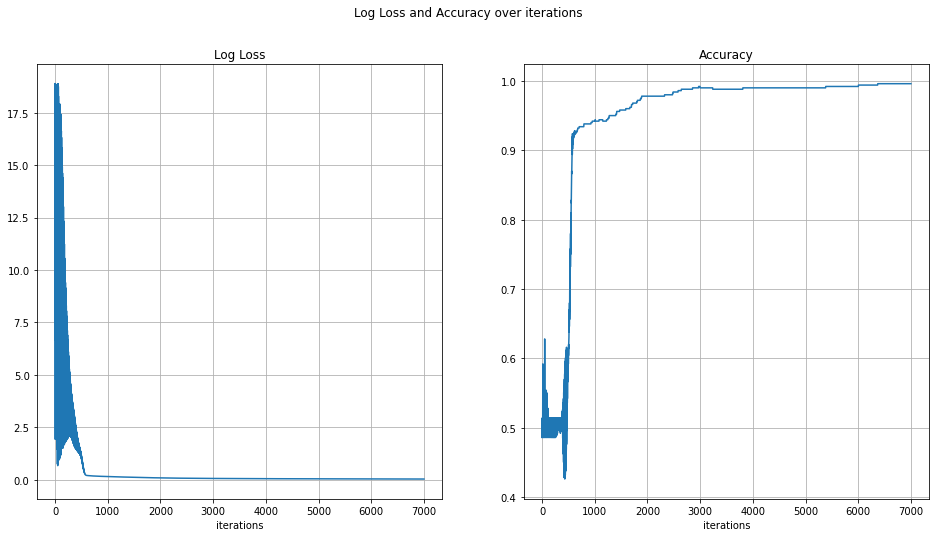

In [ ]:
#### Initialize the network parameters

np.random.seed(1241)

#quanti neuroni il layer interno?
#input layer = 3 neuroni dato che la matrice x ha 2 feauture + bias
#output layer = 1 neurone dato che la risposta è binaria
#neuroni nel layer interno scelto per poi indicare la matrice di pesi corretta = 4
#non esiste una linea guida sul numero di neuroni da usare negli strati interni -> vanno testati

#più pesi ho da addestrare maggiore deve essere il numero di iterazioni per poter gestire i pesi
# con 2000 pesi 1000 iterazioni sono troppo poche pe avvicinarsi ad un livello buono
#con 2k e 7k il learning rate di 0.003 è sicuramente sbagliato (fa molta fatica a salire accuratezza)
#il valore 0,1 può essere scelto come si vuole
#3, 4 -> righe e colonne per W1 -> 3 neuroni primo layer, 4 neuroni secondo layer
# (4) per W2 = neuroni hidden layer (se sono inferiori all'input diminuisce fortemente l'accuracy)
W_1 = np.random.uniform(0,1,size = (3,2000)) # 3 valori per input layer 4 neuroni per hidden layer
W_2 = np.random.uniform(0,1,size = (2000))
#PROBLEMA: se arriva ad 1 nei dati di training quasi sicuramente overfitting nei dati di test
num_iter = 7000 #1000 -> aumento a 7k per migliorare ulteriormente i dati
learning_rate = 0.003 
x_mat = x_mat_full


loss_vals, accuracies = [], [] #iterazione per iterazione loss e accuracies
#Passaggi da calcolare:
for i in range(num_iter):
    ### Do a forward pass, and get the gradient corrispondente
    y_pred, (J_W_1_grad,J_W_2_grad) = forward_pass(W_1,W_2)
    
    ## Update the weight matrices
    W_1 = W_1 - J_W_1_grad*learning_rate
    W_2 = W_2 - J_W_2_grad*learning_rate
    
    ### Compute the loss and accuracy (y_pred >= 0.5 considered as 1)
    current_loss = loss_fn(y,y_pred)
    loss_vals.append(current_loss)
    current_acc = np.sum((y_pred>=0.5)==y)/num_obs #esempi corretti / tutti esempi
    #se y_pred > 0.5 lo vedo come 1 e vedo se è = y
    accuracies.append(current_acc)

    ## Print the loss and accuracy for every 200th iteration
    
plot_loss_accuracy(loss_vals, accuracies)

## SOLUTION

Plot the predicted answers, with mistakes in yellow

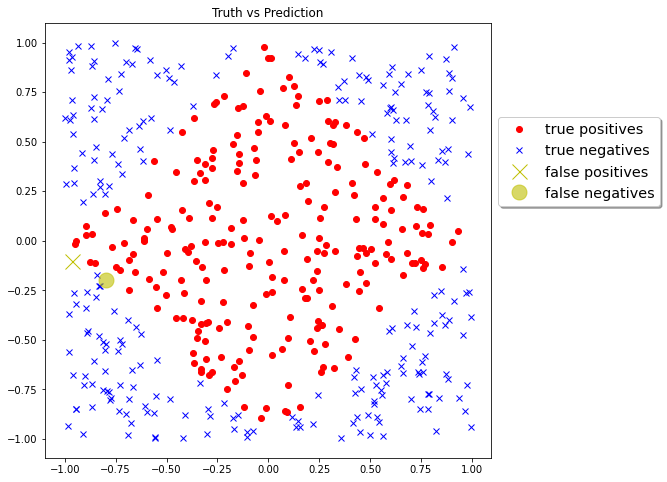

In [ ]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

##Exercise

Let's try to implement a simple shallow neural network with 4 neurons in the hidden layer.

How many output neurons do we need?

##SOLUTION

In [ ]:
import tensorflow as tf


(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
		metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)


11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 2.8325 - accuracy: 0.8753
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4317 - accuracy: 0.9067
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4094 - accuracy: 0.9103
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3765 - accuracy: 0.9171
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2880 - accuracy: 0.9458


[0.2879837453365326, 0.9458000063896179]

In [ ]:
history = model.fit(x_mat, y,epochs=2000,verbose=2)

plot_loss_accuracy(history.history['loss'], history.history['acc'])
